# Import Libraries

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
# define function to pick model after it is fit
def pickle_model(model_name, model):
    model_pickle_path = './models/{}.pkl'.format(model_name)
    model_pickle = open(model_pickle_path, 'wb')
    pickle.dump(model, model_pickle)
    model_pickle.close()

# Import Data

In [3]:
# import dataset into pandas and assign to variable
data = pd.read_pickle('./cleaned_data/dummies_user_df.pkl')

In [4]:
data.shape

(103209, 54)

In [5]:
data.head()

,user_id,likes_count,replies_count,retweets_count,tweet_ss,target,num_hashtags,avg_convo_ss,avg_day_ss,avg_season_ss,...,Month_3,Month_4,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,PM
0,57,1.666667,0.666667,0.000000,0.450733,0,2.000000,0.450733,0.345007,0.393048,...,0.000000,0.0,0.000000,0.333333,0.0,0.000000,0.0,0.000000,0.0,1.000000
1,59,3.527778,0.694444,0.222222,0.579114,0,2.000000,0.583351,0.347117,0.502371,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.500000
2,76,12.368421,1.526316,0.631579,0.615095,0,3.789474,0.614055,0.354977,0.484822,...,0.052632,0.0,0.000000,0.000000,0.0,0.052632,0.0,0.000000,0.0,0.526316
3,224,6.428571,0.571429,0.714286,0.119571,1,2.000000,0.119571,0.331380,0.321834,...,0.142857,0.0,0.285714,0.000000,0.0,0.142857,0.0,0.000000,0.0,0.857143
4,291,20.666667,1.666667,0.166667,0.198967,1,2.000000,0.198967,0.368641,0.346405,...,0.166667,0.0,0.166667,0.000000,0.0,0.000000,0.0,0.166667,0.0,0.833333


In [6]:
data.isnull().sum()

user_id               0
likes_count           0
replies_count         0
retweets_count        0
tweet_ss              0
target                0
num_hashtags          0
avg_convo_ss          0
avg_day_ss            0
avg_season_ss         0
avg_time_of_day_ss    0
avg_tag_ss            0
avg_pop_ss            0
hashtag_anxiety       0
hashtag_depression    0
hashtag_friends       0
hashtag_fun           0
hashtag_happiness     0
hashtag_happy         0
hashtag_hope          0
hashtag_lonely        0
hashtag_love          0
hashtag_pain          0
hashtag_peace         0
hashtag_ptsd          0
hashtag_sad           0
hashtag_smile         0
hashtag_stress        0
hashtag_suicide       0
search_anxiety        0
search_depression     0
search_happiness      0
search_happy          0
Friday                0
Monday                0
Saturday              0
Sunday                0
Thursday              0
Tuesday               0
autumn                0
spring                0
summer          

In [7]:
data.describe()

,user_id,likes_count,replies_count,retweets_count,tweet_ss,target,num_hashtags,avg_convo_ss,avg_day_ss,avg_season_ss,...,Month_3,Month_4,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,PM
count,1.032090e+05,1.032090e+05,103209.000000,103209.000000,103209.000000,103209.000000,103209.000000,103209.000000,103209.000000,103209.000000,...,103209.000000,103209.000000,103209.000000,103209.000000,103209.000000,103209.000000,103209.000000,103209.000000,103209.000000,103209.000000
mean,4.007678e+16,3.143333e+02,9.730886,54.004333,0.423785,0.420651,9.265747,0.423760,0.352528,0.370201,...,0.049310,0.042420,0.055327,0.046559,0.045143,0.047422,0.047223,0.043371,0.048014,0.536867
std,1.834767e+17,6.492188e+03,309.915638,1784.883581,0.442188,0.493666,13.676750,0.441519,0.029120,0.125644,...,0.160046,0.148398,0.172865,0.156964,0.153716,0.157773,0.156721,0.149716,0.158832,0.399075
min,5.700000e+01,0.000000e+00,0.000000,0.000000,-0.986900,0.000000,0.000000,-0.986900,0.322150,0.168943,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.817751e+07,2.555556e+00,0.000000,0.050000,0.140475,0.000000,2.000000,0.140800,0.331313,0.252510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.239265e+08,1.033333e+01,0.777778,1.625000,0.571900,0.000000,2.500000,0.571900,0.342849,0.377119,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,4.847247e+08,4.800000e+01,2.350000,7.000000,0.775650,1.000000,12.000000,0.774350,0.364069,0.502371,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.129902e+18,1.438405e+06,85633.500000,475847.250000,0.992800,1.000000,259.000000,0.992800,0.430960,0.502371,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preparation

In [8]:
# identify features
features = data.drop('user_id', axis=1).copy()

In [9]:
# identify X and y
X = features.drop('target', axis=1)
y = features.target

In [10]:
# create training and testing datasets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [11]:
print('X_train', len(X_train))
print('X_test', len(X_test))
print('y_train', len(y_train))
print('y_test', len(y_test))

X_train 82567
X_test 20642
y_train 82567
y_test 20642


## Class Imbalance

In [12]:
# Concat X_train, y_train together into a training dataset
data_train = pd.concat([X_train, y_train], axis=1)

In [13]:
# Separate minority and majority classes
happy = data_train[data_train.target == 0]
sad = data_train[data_train.target == 1]

In [14]:
print('# of Happy Users: '+ str(len(happy)))
print('# of Sad Users: '+ str(len(sad)))

# of Happy Users: 47888
# of Sad Users: 34679


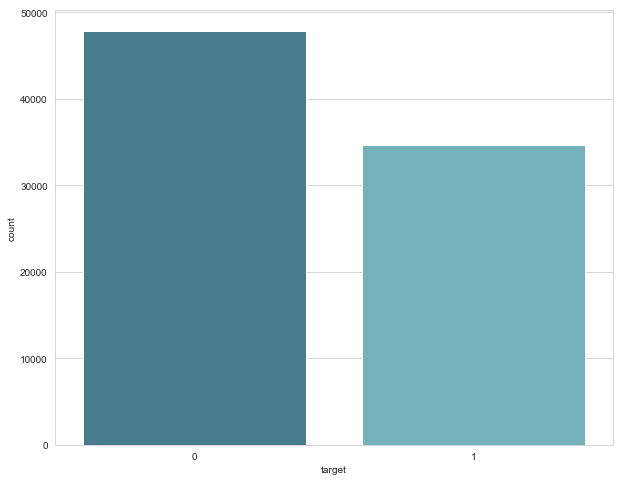

In [15]:
# visualize class balance
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x='target',data=data_train, palette='GnBu_d')

In [16]:
# Undersample majority
sad_downsampled = resample(happy,
                                replace = False, # sample without replacement
                                n_samples = len(sad), # match minority n
                                random_state = 23) # reproducible results

In [17]:
# combine minority and downsampled majority
downsampled = pd.concat([sad, sad_downsampled])

In [18]:
# check counts
downsampled.target.value_counts()

1    34679
0    34679
Name: target, dtype: int64

In [19]:
# redefine X_train, y_train
X_train = downsampled.drop('target', axis=1)
y_train = downsampled.target

In [20]:
print('X_train', len(X_train))
print('X_test', len(X_test))
print('y_train', len(y_train))
print('y_test', len(y_test))

X_train 69358
X_test 20642
y_train 69358
y_test 20642


## Scaling the Data

In [21]:
# instantiate the scaler, fit to train data and transform it
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)

In [22]:
#Use the scaler that is fit to the training data to transform the testing data
scaled_test = scaler.transform(X_test)

In [23]:
# turn scaled training dataset to pandas dataframe
scaled_train = pd.DataFrame(scaled_train, columns=X_train.columns)
scaled_train.head()

,likes_count,replies_count,retweets_count,tweet_ss,num_hashtags,avg_convo_ss,avg_day_ss,avg_season_ss,avg_time_of_day_ss,avg_tag_ss,...,Month_3,Month_4,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,PM
0,-0.063439,-0.063309,-0.069375,0.579435,0.920042,0.580318,-0.469746,0.580447,1.376670,0.533013,...,-0.321322,-0.299048,-0.334257,-0.307360,-0.305163,-0.313858,-0.314666,1.026635,-0.310497,-1.376670
1,-0.042042,0.058221,-0.055103,-1.556802,-0.529032,-1.559524,-0.747734,-1.520728,1.376670,-1.273893,...,-0.321322,-0.299048,5.365339,-0.307360,-0.305163,-0.313858,-0.314666,-0.300668,-0.310497,-1.376670
2,-0.062361,-0.060460,-0.070105,-0.533726,-0.161103,-0.534722,-0.037971,-1.045963,-0.213400,-0.481543,...,0.449442,-0.299048,0.378193,-0.307360,-0.305163,0.464497,1.256376,-0.300668,1.272246,0.213400
3,-0.063544,-0.057965,-0.071209,0.270110,-0.527391,0.277962,-0.273497,1.100994,0.466622,0.977957,...,-0.321322,-0.299048,-0.322993,-0.294837,-0.305163,-0.301552,-0.314666,-0.300668,-0.310497,-0.466622
4,-0.063485,-0.063309,-0.071321,-2.588290,-0.529032,-2.592753,0.052293,-0.223959,0.104614,-1.735881,...,-0.321322,-0.299048,-0.334257,-0.307360,-0.305163,2.799561,-0.314666,-0.300668,-0.310497,-0.104614


In [24]:
scaled_train.shape

(69358, 52)

In [25]:
# turn scaled testing dataset to pandas dataframe
scaled_test = pd.DataFrame(scaled_test, columns=X_test.columns)
scaled_test.head()

,likes_count,replies_count,retweets_count,tweet_ss,num_hashtags,avg_convo_ss,avg_day_ss,avg_season_ss,avg_time_of_day_ss,avg_tag_ss,...,Month_3,Month_4,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,PM
0,0.083635,0.165940,0.078921,0.036103,-0.529032,0.072359,0.089969,-0.337856,-0.011027,-0.772313,...,0.239234,0.302628,0.183888,-0.30736,0.278223,0.818294,0.256622,0.302651,-0.310497,0.011027
1,-0.058441,-0.051440,-0.062199,0.646516,-0.279029,0.647513,0.569359,1.116718,1.376670,0.984739,...,-0.321322,-0.299048,-0.334257,-0.30736,-0.305163,-0.313858,-0.314666,-0.300668,-0.310497,-1.376670
2,0.048108,0.103795,-0.037263,0.391871,-0.529032,0.392438,2.785987,-1.520728,1.376670,0.868778,...,-0.321322,-0.299048,-0.334257,-0.30736,6.112082,-0.313858,-0.314666,-0.300668,-0.310497,-1.376670
3,-0.055646,-0.055713,-0.064834,1.169928,0.678530,1.171808,2.785987,1.116718,-1.167441,0.984739,...,-0.321322,-0.299048,-0.334257,-0.30736,-0.305163,-0.313858,-0.314666,-0.300668,-0.310497,1.167441
4,-0.058268,-0.057612,-0.054697,-1.145983,2.706856,-1.148012,-0.729156,-1.045963,0.104614,-1.807817,...,-0.321322,0.528257,0.378193,-0.30736,-0.305163,0.464497,1.256376,-0.300668,0.480875,-0.104614


In [26]:
scaled_test.shape

(20642, 52)

# Base Models

## Naive Bayes

In [128]:
# create a Naive Bayes instance and assign to variable
clf = GaussianNB()

In [129]:
# fit Naive Bayes instance to training data and assign to variable
nb_base = clf.fit(scaled_train, y_train)

In [130]:
nb_base

GaussianNB(priors=None, var_smoothing=1e-09)

In [131]:
# create a classification report for the model on training data
nb_preds_train = nb_base.predict(scaled_train)
print(classification_report(y_train, nb_preds_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34679
           1       1.00      1.00      1.00     34679

    accuracy                           1.00     69358
   macro avg       1.00      1.00      1.00     69358
weighted avg       1.00      1.00      1.00     69358



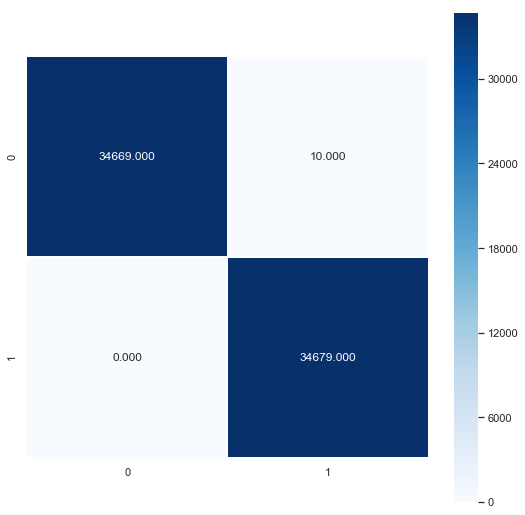

In [132]:
#confusion matrix visualization of train data
cm_nb_train = confusion_matrix(y_train, nb_preds_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_nb_train, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [133]:
# create a classification report for the model on testing data
nb_preds_test = nb_base.predict(scaled_test)
print(classification_report(y_test, nb_preds_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11906
           1       1.00      1.00      1.00      8736

    accuracy                           1.00     20642
   macro avg       1.00      1.00      1.00     20642
weighted avg       1.00      1.00      1.00     20642



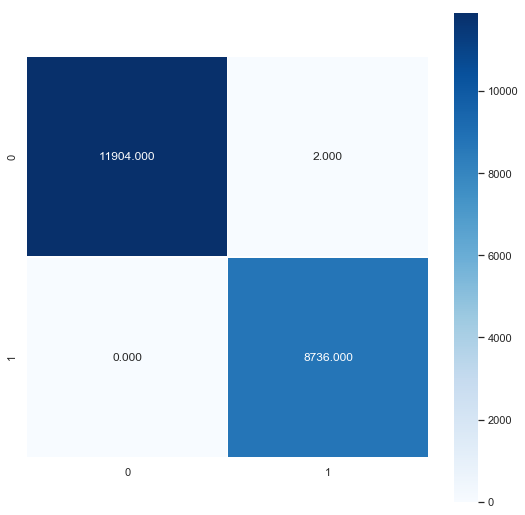

In [134]:
#confusion matrix visualization of train data
cm_nb_test = confusion_matrix(y_test, nb_preds_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_nb_test, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [135]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, nb_preds_train))
print('Testing F1 Score:', f1_score(y_test, nb_preds_test))

Training F1 Score: 0.9998558413101142
Testing F1 Score: 0.9998855442371524


In [ ]:
# # pickle base model
# pickle_model(nb_base, nb_base)

## Support Vector Machine

In [ ]:
# create a Support Vector Machine instance for linear SVM
svm = SVC(kernel='linear')

In [ ]:
# fit SVM to training data
svm_base = svm.fit(scaled_train, y_train)

In [ ]:
# create a classification report for the model on training data
svm_preds_train = svm_base.predict(scaled_train)
print(classification_report(y_train, svm_preds_train))

In [ ]:
#confusion matrix visualization of train data
cm_svm_train = confusion_matrix(y_train, svm_preds_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_svm_train, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [ ]:
# create a classification report for the model on testing data
svm_preds_test = svm_base.predict(scaled_test)
print(classification_report(y_test, svm_preds_test))

In [ ]:
#confusion matrix visualization of train data
cm_svm_test = confusion_matrix(y_test, svm_preds_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_svm_test, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [ ]:
# # pickle base model
# pickle_model(svm_base, svm_base)

# Feature Selection

In [34]:
# import data after removing highly correlated features
data3 = pd.read_pickle('./cleaned_data/corr_user_df.pkl')

In [35]:
data3.columns

Index(['user_id', 'likes_count', 'tweet_ss', 'target', 'num_hashtags',
       'avg_day_ss', 'avg_season_ss', 'avg_time_of_day_ss', 'avg_pop_ss',
       'hashtag_anxiety', 'hashtag_depression', 'hashtag_friends',
       'hashtag_fun', 'hashtag_happiness', 'hashtag_happy', 'hashtag_hope',
       'hashtag_lonely', 'hashtag_love', 'hashtag_pain', 'hashtag_peace',
       'hashtag_ptsd', 'hashtag_sad', 'hashtag_smile', 'hashtag_stress',
       'hashtag_suicide', 'search_anxiety', 'search_happiness', 'Friday',
       'Monday', 'Saturday', 'Thursday', 'Tuesday', 'autumn', 'summer',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

## Data Preparation

In [36]:
# identify features and remove all search and keywords because they were used to define target variable
features = data3.drop(['user_id', 'hashtag_anxiety', 'hashtag_depression', 'hashtag_friends',
       'hashtag_fun', 'hashtag_happiness', 'hashtag_happy', 'hashtag_hope',
       'hashtag_lonely', 'hashtag_love', 'hashtag_pain', 'hashtag_peace',
       'hashtag_ptsd', 'hashtag_sad', 'hashtag_smile', 'hashtag_stress',
       'hashtag_suicide', 'search_anxiety', 'search_happiness'], axis=1).copy()

In [40]:
features.shape

(103209, 26)

In [37]:
# identify X and y
X = features.drop('target', axis=1)
y = features.target

In [38]:
# create training and testing datasets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [39]:
print('X_train', len(X_train))
print('X_test', len(X_test))
print('y_train', len(y_train))
print('y_test', len(y_test))

X_train 82567
X_test 20642
y_train 82567
y_test 20642


## Class Imbalance

In [41]:
# Concat X_train, y_train together into a training dataset
data_train3 = pd.concat([X_train, y_train], axis=1)

In [42]:
# Separate minority and majority classes
happy = data_train3[data_train3.target == 0]
sad = data_train3[data_train3.target == 1]

In [43]:
print('# of Happy Users: '+ str(len(happy)))
print('# of Sad Users: '+ str(len(sad)))

# of Happy Users: 47888
# of Sad Users: 34679


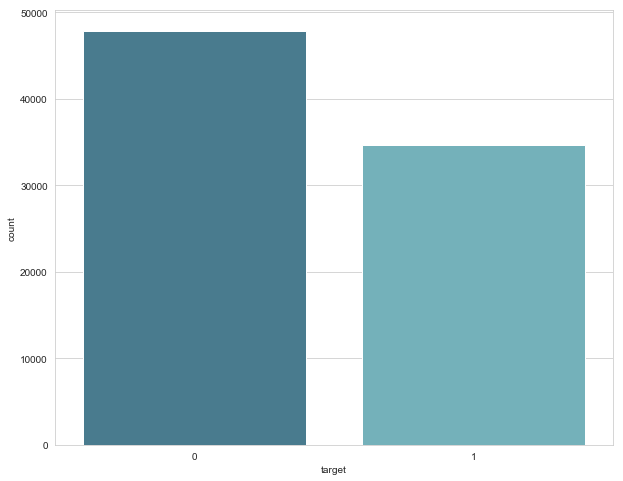

In [44]:
# visualize class balance
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x='target',data=data_train3, palette='GnBu_d')

In [45]:
# Undersample majority
sad_downsampled = resample(happy,
                                replace = False, # sample without replacement
                                n_samples = len(sad), # match minority n
                                random_state = 23) # reproducible results

In [46]:
# combine minority and downsampled majority
downsampled = pd.concat([sad, sad_downsampled])

In [47]:
# check counts
downsampled.target.value_counts()

1    34679
0    34679
Name: target, dtype: int64

In [48]:
# redefine X_train, y_train
X_train = downsampled.drop('target', axis=1)
y_train = downsampled.target

In [49]:
print('X_train', len(X_train))
print('X_test', len(X_test))
print('y_train', len(y_train))
print('y_test', len(y_test))

X_train 69358
X_test 20642
y_train 69358
y_test 20642


## Scaling the Data

In [50]:
# instantiate the scaler, fit to train data and transform it
scaler = StandardScaler()
scaled_train3 = scaler.fit_transform(X_train)

In [51]:
#Use the scaler that is fit to the training data to transform the testing data
scaled_test3 = scaler.transform(X_test)

In [52]:
# turn scaled training dataset to pandas dataframe
scaled_train3 = pd.DataFrame(scaled_train3, columns=X_train.columns)
scaled_train3.head()

,likes_count,tweet_ss,num_hashtags,avg_day_ss,avg_season_ss,avg_time_of_day_ss,avg_pop_ss,Friday,Monday,Saturday,...,Month_2,Month_3,Month_4,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,-0.063439,0.579435,0.920042,-0.469746,0.580447,1.376670,0.000000,0.966728,-0.559300,0.458559,...,-0.29904,-0.321322,-0.299048,-0.334257,-0.307360,-0.305163,-0.313858,-0.314666,1.026635,-0.310497
1,-0.042042,-1.556802,-0.529032,-0.747734,-1.520728,1.376670,0.000000,-0.567781,-0.559300,-0.454016,...,-0.29904,-0.321322,-0.299048,5.365339,-0.307360,-0.305163,-0.313858,-0.314666,-0.300668,-0.310497
2,-0.062361,-0.533726,-0.161103,-0.037971,-1.045963,-0.213400,0.000000,-0.088247,0.427638,0.116344,...,-0.29904,0.449442,-0.299048,0.378193,-0.307360,-0.305163,0.464497,1.256376,-0.300668,1.272246
3,-0.063544,0.270110,-0.527391,-0.273497,1.100994,0.466622,11.440568,0.175213,-0.036574,0.005879,...,-0.29904,-0.321322,-0.299048,-0.322993,-0.294837,-0.305163,-0.301552,-0.314666,-0.300668,-0.310497
4,-0.063485,-2.588290,-0.529032,0.052293,-0.223959,0.104614,0.000000,-0.567781,1.414577,1.827421,...,-0.29904,-0.321322,-0.299048,-0.334257,-0.307360,-0.305163,2.799561,-0.314666,-0.300668,-0.310497


In [53]:
scaled_train3.shape

(69358, 25)

In [54]:
# turn scaled testing dataset to pandas dataframe
scaled_test3 = pd.DataFrame(scaled_test3, columns=X_test.columns)
scaled_test3.head()

,likes_count,tweet_ss,num_hashtags,avg_day_ss,avg_season_ss,avg_time_of_day_ss,avg_pop_ss,Friday,Monday,Saturday,...,Month_2,Month_3,Month_4,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0.083635,0.036103,-0.529032,0.089969,-0.337856,-0.011027,0.0,-0.567781,0.517360,-0.039209,...,-0.29904,0.239234,0.302628,0.183888,-0.30736,0.278223,0.818294,0.256622,0.302651,-0.310497
1,-0.058441,0.646516,-0.279029,0.569359,1.116718,1.376670,0.0,-0.088247,-0.065831,0.971882,...,-0.29904,-0.321322,-0.299048,-0.334257,-0.30736,-0.305163,-0.313858,-0.314666,-0.300668,-0.310497
2,0.048108,0.391871,-0.529032,2.785987,-1.520728,1.376670,0.0,-0.567781,-0.559300,-0.454016,...,-0.29904,-0.321322,-0.299048,-0.334257,-0.30736,6.112082,-0.313858,-0.314666,-0.300668,-0.310497
3,-0.055646,1.169928,0.678530,2.785987,1.116718,-1.167441,0.0,-0.567781,-0.559300,-0.454016,...,-0.29904,-0.321322,-0.299048,-0.334257,-0.30736,-0.305163,-0.313858,-0.314666,-0.300668,-0.310497
4,-0.058268,-1.145983,2.706856,-0.729156,-1.045963,0.104614,0.0,-0.567781,0.427638,-0.454016,...,-0.29904,-0.321322,0.528257,0.378193,-0.30736,-0.305163,0.464497,1.256376,-0.300668,0.480875


In [55]:
scaled_test3.shape

(20642, 25)

# Rerun Models

## Logistic Regression

In [118]:
# instantiate the Logistic Regression Model and fit to training data
logmodel = LogisticRegression(solver='saga')

In [119]:
# fit model to training data
lr = logmodel.fit(scaled_train3, y_train)

In [120]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
# Create a classification report for the model on training data
lr_preds_train = lr_base.predict(scaled_train3)
print(classification_report(y_train, lr_preds_train))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     34679
           1       0.82      0.77      0.80     34679

    accuracy                           0.80     69358
   macro avg       0.80      0.80      0.80     69358
weighted avg       0.80      0.80      0.80     69358



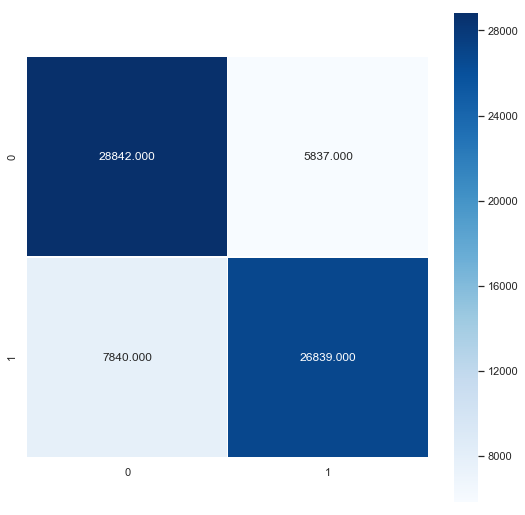

In [122]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, lr_preds_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [123]:
#Predictions and Evaluations
lr_preds_test = lr_base.predict(scaled_test3)
print(classification_report(y_test, lr_preds_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     11906
           1       0.77      0.77      0.77      8736

    accuracy                           0.81     20642
   macro avg       0.80      0.80      0.80     20642
weighted avg       0.81      0.81      0.81     20642



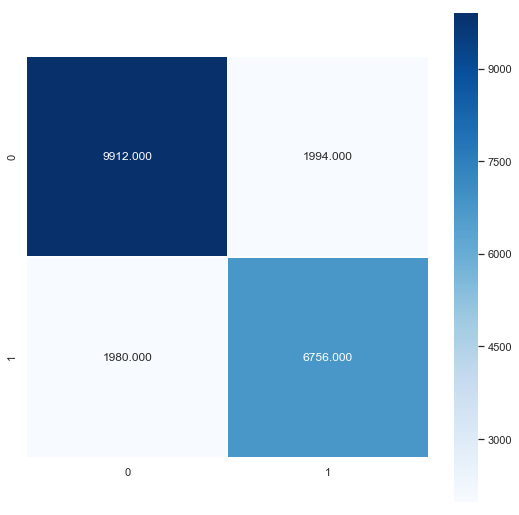

In [124]:
#confusion matrix visualization of test data
cm_lr = confusion_matrix(y_test, lr_preds_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [136]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, lr_preds_train))
print('Testing F1 Score:', f1_score(y_test, lr_preds_test))

Training F1 Score: 0.796941578205033
Testing F1 Score: 0.7727324716916392


In [139]:
lr.coef_

array([[ 1.07316383e-03, -1.77191965e+00, -1.22834552e-01,
        -1.48518757e-01, -2.22814211e-01, -6.30303625e-02,
         9.28932206e-02,  1.61111844e-02,  8.53412279e-03,
        -4.01622401e-02, -3.65447942e-02, -5.36955937e-03,
         9.40460720e-02,  8.11953347e-02,  1.33341462e-01,
         8.71331662e-02,  2.37187113e-01,  2.23751213e-01,
         1.06129150e-01,  8.67653214e-03,  1.44838306e-02,
         5.08291205e-02,  7.56148529e-02,  3.05122748e-02,
         6.13609085e-02]])

In [141]:
lr.intercept_

array([0.19167526])

In [126]:
# pickle base model
# model_pickle_path = './models/logmodel.pkl'
# model_pickle = open(model_pickle_path, 'wb')
# pickle.dump(lr, model_pickle)
# model_pickle.close()

## Naive Bayes

In [56]:
# create a Naive Bayes instance and assign to variable
clf3 = GaussianNB()

In [57]:
# fit Naive Bayes instance to training data and assign to variable
nb_rerun2 = clf.fit(scaled_train3, y_train)

In [58]:
nb_rerun2

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
# create a classification report for the model on training data
nb_preds_train3 = nb_rerun2.predict(scaled_train3)
print(classification_report(y_train, nb_preds_train3))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75     34679
           1       0.74      0.78      0.76     34679

    accuracy                           0.75     69358
   macro avg       0.76      0.75      0.75     69358
weighted avg       0.76      0.75      0.75     69358



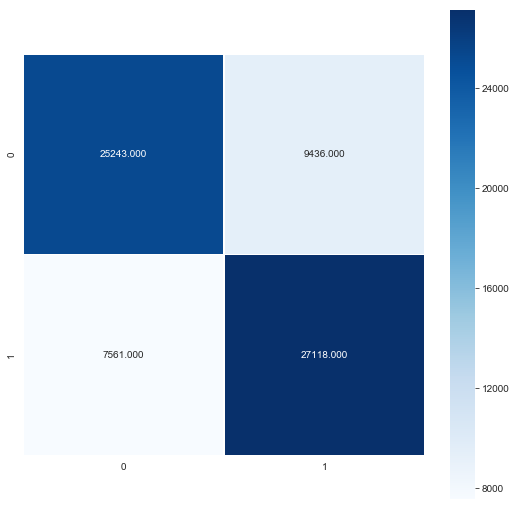

In [60]:
#confusion matrix visualization of train data
cm_nb_train3 = confusion_matrix(y_train, nb_preds_train3)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_nb_train3, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [61]:
# create a classification report for the model on testing data
nb_preds_test3 = nb_rerun2.predict(scaled_test3)
print(classification_report(y_test, nb_preds_test3))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77     11906
           1       0.68      0.78      0.73      8736

    accuracy                           0.75     20642
   macro avg       0.75      0.76      0.75     20642
weighted avg       0.76      0.75      0.75     20642



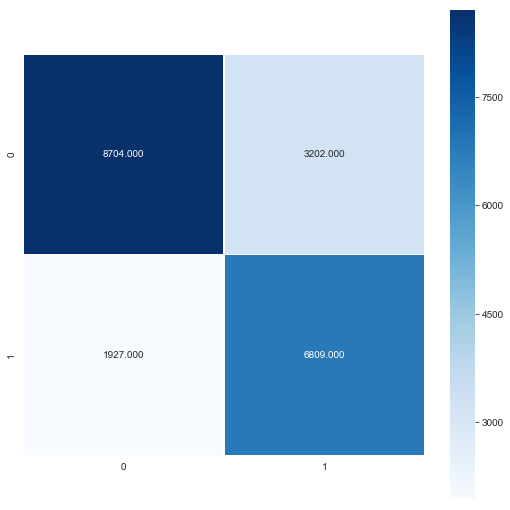

In [62]:
#confusion matrix visualization of train data
cm_nb_test3 = confusion_matrix(y_test, nb_preds_test3)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_nb_test3, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [137]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, nb_preds_train3))
print('Testing F1 Score:', f1_score(y_test, nb_preds_test3))

Training F1 Score: 0.7613886822118962
Testing F1 Score: 0.7264095588627514


In [63]:
# # pickle base model
# pickle_model(nb_rerun2, nb_rerun2)

## Support Vector Machine

In [64]:
# create a Support Vector Machine instance for linear SVM
svm3 = SVC(kernel='linear')

In [71]:
# fit SVM to training data
svm_rerun2 = svm3.fit(scaled_train3, y_train)

In [72]:
# create a classification report for the model on training data
svm_preds_train3 = svm_rerun2.predict(scaled_train3)
print(classification_report(y_train, svm_preds_train3))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     34679
           1       0.82      0.78      0.80     34679

    accuracy                           0.81     69358
   macro avg       0.81      0.81      0.81     69358
weighted avg       0.81      0.81      0.81     69358



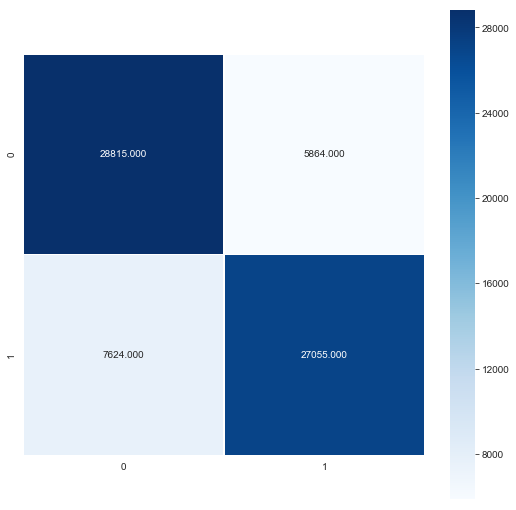

In [73]:
#confusion matrix visualization of train data
cm_svm_train3 = confusion_matrix(y_train, svm_preds_train3)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_svm_train3, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [74]:
# create a classification report for the model on testing data
svm_preds_test3 = svm_rerun2.predict(scaled_test3)
print(classification_report(y_test, svm_preds_test3))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     11906
           1       0.77      0.78      0.78      8736

    accuracy                           0.81     20642
   macro avg       0.81      0.81      0.81     20642
weighted avg       0.81      0.81      0.81     20642



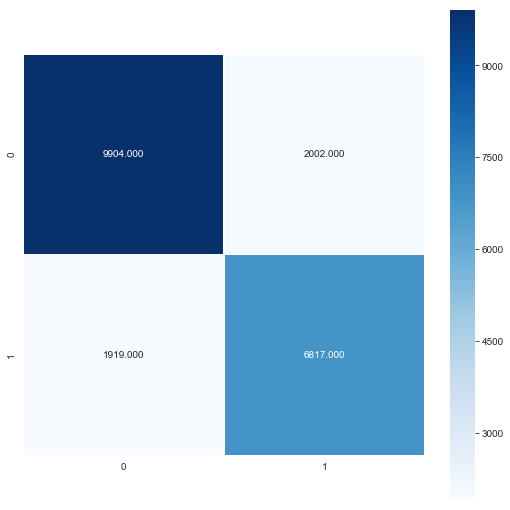

In [75]:
#confusion matrix visualization of train data
cm_svm_test3 = confusion_matrix(y_test, svm_preds_test3)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_svm_test3, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [138]:
# Model Accuracy, how often is the classifier correct?
print('Training F1 Score:', f1_score(y_train, svm_preds_train3))
print('Testing F1 Score:', f1_score(y_test, svm_preds_test3))

Training F1 Score: 0.8004674694517588
Testing F1 Score: 0.7766448305326118


In [77]:
# # pickle rerun model
# pickle_model(svm_rerun2, svm_rerun2)

## Feature Importance with Decision Tree

In [80]:
# Create an instance of DecisionTreeClassifier() called dtree
dtree = DecisionTreeClassifier()

In [81]:
# fit Decision Tree Classifier object to training data
dtree_select = dtree.fit(X_train, y_train)

In [82]:
# Calculate feature importances and put in dataframe
feat_importances = pd.DataFrame(zip(X_train.columns, dtree_select.feature_importances_), columns=['Feature','Feature Importance'])

In [83]:
# sort feature importances based on value
feat_importances = feat_importances.sort_values('Feature Importance', ascending=False).reset_index(drop=True)

In [86]:
feat_importances.head()

,Feature,Feature Importance
0,tweet_ss,0.569326
1,avg_season_ss,0.074413
2,likes_count,0.064920
3,num_hashtags,0.053296
4,avg_day_ss,0.038614


In [84]:
feat_importances.tail()

,Feature,Feature Importance
20,autumn,0.006774
21,Month_9,0.006723
22,Month_8,0.006613
23,Month_10,0.005991
24,avg_pop_ss,0.000000


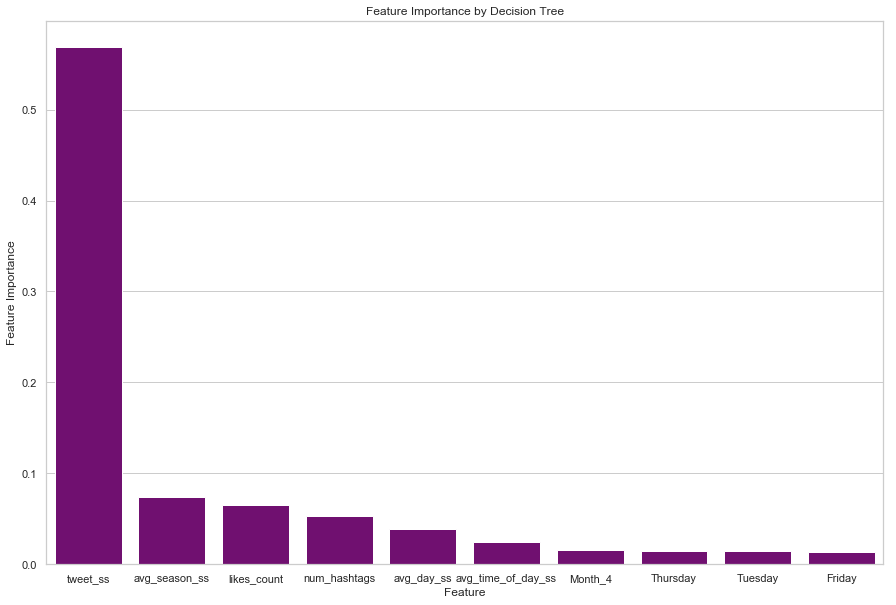

In [85]:
# plot feature importances
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
plt.title('Feature Importance by Decision Tree')
sns.barplot(feat_importances['Feature'][:10], feat_importances['Feature Importance'][:10], color='purple')